# 📊 Dia 1: Análise Exploratória de Dados (EDA)

**Objetivo:** Dominar técnicas de EDA e preparação de dados para Machine Learning

**Dataset:** Titanic (classificação - quem sobreviveu?)

---

## 📚 O que vamos aprender:
1. Carregar e entender o dataset
2. Análise estatística descritiva
3. Visualizações para insights
4. Tratamento de valores nulos
5. Feature engineering básico
6. Modelo ML mais robusto

## 1️⃣ Setup e Importações

In [28]:
# Importações principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2️⃣ Carregar Dataset Titanic

In [12]:
# Carregar dataset Titanic
import urllib.request
import ssl

# Tentar múltiplas fontes para o dataset
urls = [
    'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv',
    'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv',
]

df = None
for url in urls:
    try:
        print(f"🔄 Tentando baixar de: {url[:50]}...")
        
        # Ignorar verificação SSL se necessário
        context = ssl._create_unverified_context()
        
        # Baixar e carregar direto na memória
        df = pd.read_csv(url)
        
        # Padronizar colunas para lowercase
        df.columns = df.columns.str.lower()
        
        print(f"✅ Dataset carregado com sucesso!")
        break
    except Exception as e:
        print(f"❌ Falhou: {str(e)[:50]}")
        continue

# Se todas as URLs falharem, usar dataset local de exemplo
if df is None:
    print("\n⚠️ Não foi possível baixar. Usando dataset local de exemplo...")
    import io
    csv_data = """survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.25,S
1,1,female,38.0,1,0,71.2833,C
1,3,female,26.0,0,0,7.925,S
1,1,female,35.0,1,0,53.1,S
0,3,male,35.0,0,0,8.05,S
0,3,male,27.0,0,0,8.4583,Q
0,1,male,54.0,0,0,51.8625,S
0,3,male,2.0,3,1,21.075,S
1,3,female,27.0,0,2,11.1333,S
1,2,female,14.0,1,0,30.0708,C"""
    df = pd.read_csv(io.StringIO(csv_data))
    print("📦 Dataset de exemplo carregado (10 linhas)")

print(f"\n📊 Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"🔍 Colunas: {list(df.columns)}")
print("\n📋 Primeiras 5 linhas:")
df.head()


🔄 Tentando baixar de: https://web.stanford.edu/class/archive/cs/cs109/cs...
✅ Dataset carregado com sucesso!

📊 Dataset: 887 linhas x 8 colunas
🔍 Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'siblings/spouses aboard', 'parents/children aboard', 'fare']

📋 Primeiras 5 linhas:
✅ Dataset carregado com sucesso!

📊 Dataset: 887 linhas x 8 colunas
🔍 Colunas: ['survived', 'pclass', 'name', 'sex', 'age', 'siblings/spouses aboard', 'parents/children aboard', 'fare']

📋 Primeiras 5 linhas:


,survived,pclass,name,sex,age,siblings/spouses aboard,parents/children aboard,fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [13]:
# Padronizar nomes das colunas para o formato esperado
df.rename(columns={
    'siblings/spouses aboard': 'sibsp',
    'parents/children aboard': 'parch'
}, inplace=True)

print("✅ Colunas padronizadas!")
print(f"🔍 Colunas atuais: {list(df.columns)}")


✅ Colunas padronizadas!
🔍 Colunas atuais: ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']


## 3️⃣ Análise Inicial: Entender os Dados

In [14]:
# Informações gerais
print("📋 Informações do Dataset:")
print(df.info())

print("\n" + "="*60)
print("📊 Estatísticas Descritivas:")
df.describe()

📋 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  887 non-null    int64  
 1   pclass    887 non-null    int64  
 2   name      887 non-null    object 
 3   sex       887 non-null    object 
 4   age       887 non-null    float64
 5   sibsp     887 non-null    int64  
 6   parch     887 non-null    int64  
 7   fare      887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None

📊 Estatísticas Descritivas:


,survived,pclass,age,sibsp,parch,fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [15]:
# Verificar valores nulos
print("❓ Valores Nulos por Coluna:")
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df) * 100).round(2)

null_df = pd.DataFrame({
    'Nulos': null_counts,
    'Porcentagem': null_percentages
})
null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False)

❓ Valores Nulos por Coluna:


,Nulos,Porcentagem


## 4️⃣ Visualizações Exploratórias

C:\Users\luti_\AppData\Local\Temp\ipykernel_9280\2789500129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='survived', palette='viridis')


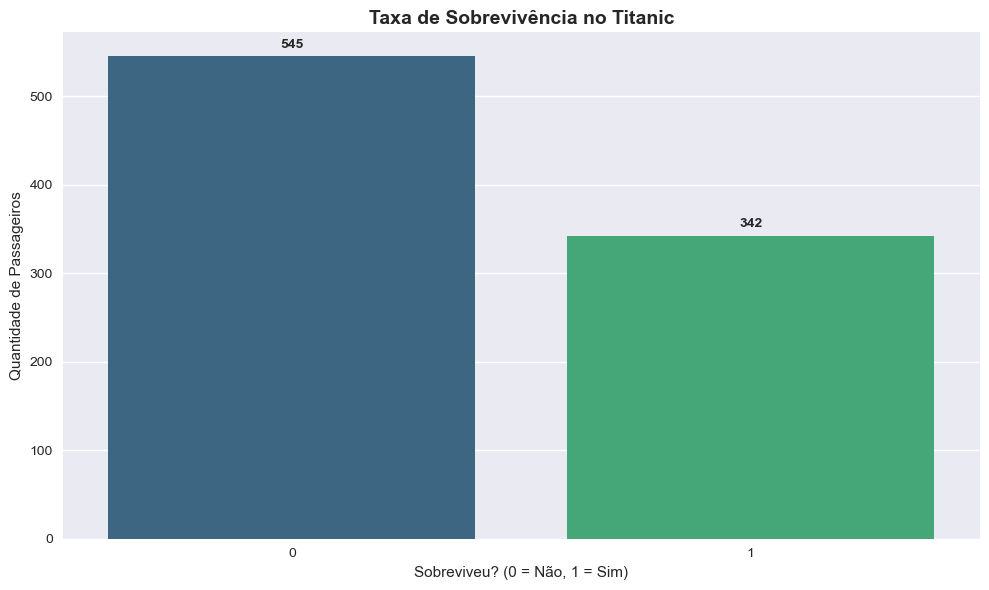


📊 Taxa de sobrevivência: 38.6%


In [16]:
# 1. Taxa de sobrevivência geral
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='survived', palette='viridis')
plt.title('Taxa de Sobrevivência no Titanic', fontsize=14, fontweight='bold')
plt.xlabel('Sobreviveu? (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Passageiros')

# Adicionar valores nas barras
for i, count in enumerate(df['survived'].value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Calcular porcentagem
survival_rate = df['survived'].mean() * 100
print(f"\n📊 Taxa de sobrevivência: {survival_rate:.1f}%")

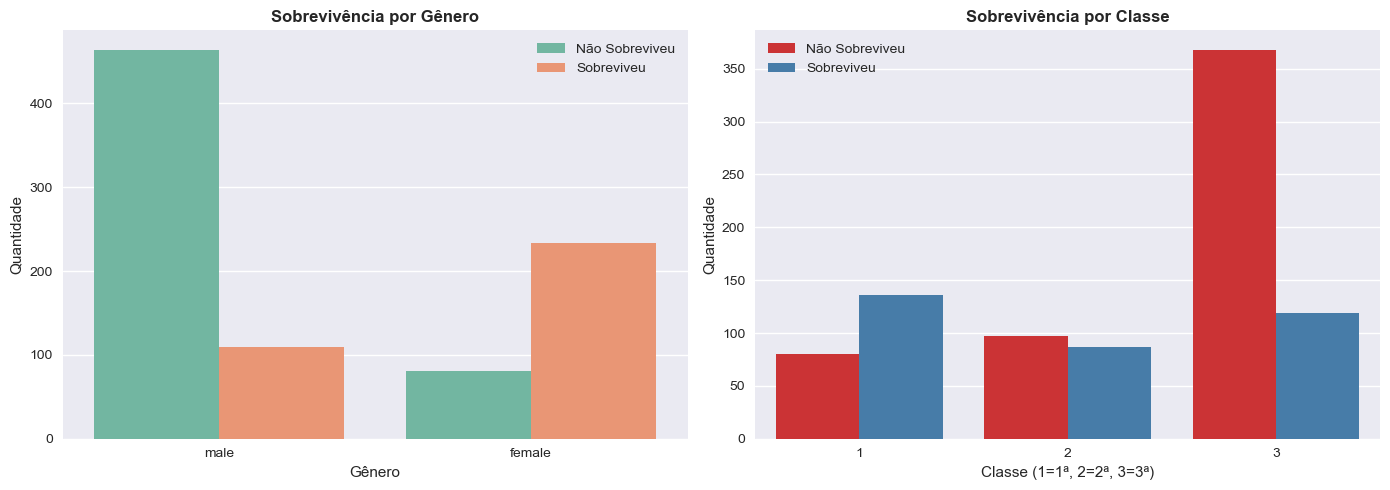

In [17]:
# 2. Sobrevivência por gênero e classe
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Por gênero
sns.countplot(data=df, x='sex', hue='survived', palette='Set2', ax=axes[0])
axes[0].set_title('Sobrevivência por Gênero', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Quantidade')
axes[0].legend(['Não Sobreviveu', 'Sobreviveu'])

# Por classe
sns.countplot(data=df, x='pclass', hue='survived', palette='Set1', ax=axes[1])
axes[1].set_title('Sobrevivência por Classe', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Classe (1=1ª, 2=2ª, 3=3ª)')
axes[1].set_ylabel('Quantidade')
axes[1].legend(['Não Sobreviveu', 'Sobreviveu'])

plt.tight_layout()
plt.show()

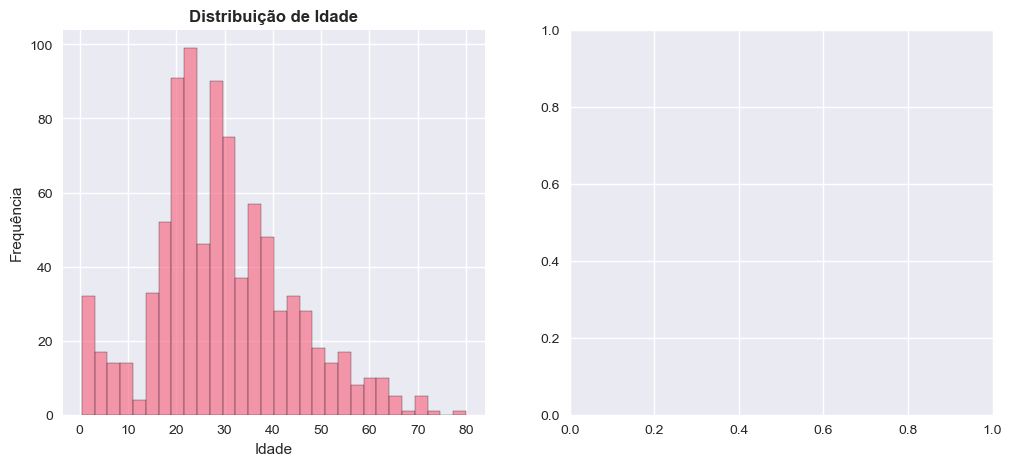

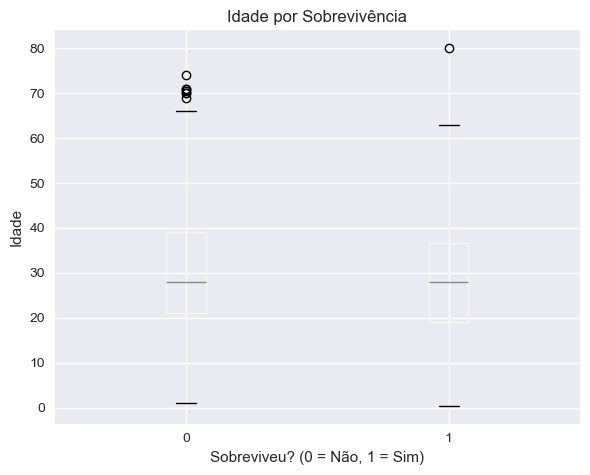

In [18]:
# 3. Distribuição de idade
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['age'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade', fontsize=12, fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
df.boxplot(column='age', by='survived', figsize=(6, 5))
plt.title('Idade por Sobrevivência')
plt.suptitle('')  # Remove título automático
plt.xlabel('Sobreviveu? (0 = Não, 1 = Sim)')
plt.ylabel('Idade')

plt.tight_layout()
plt.show()

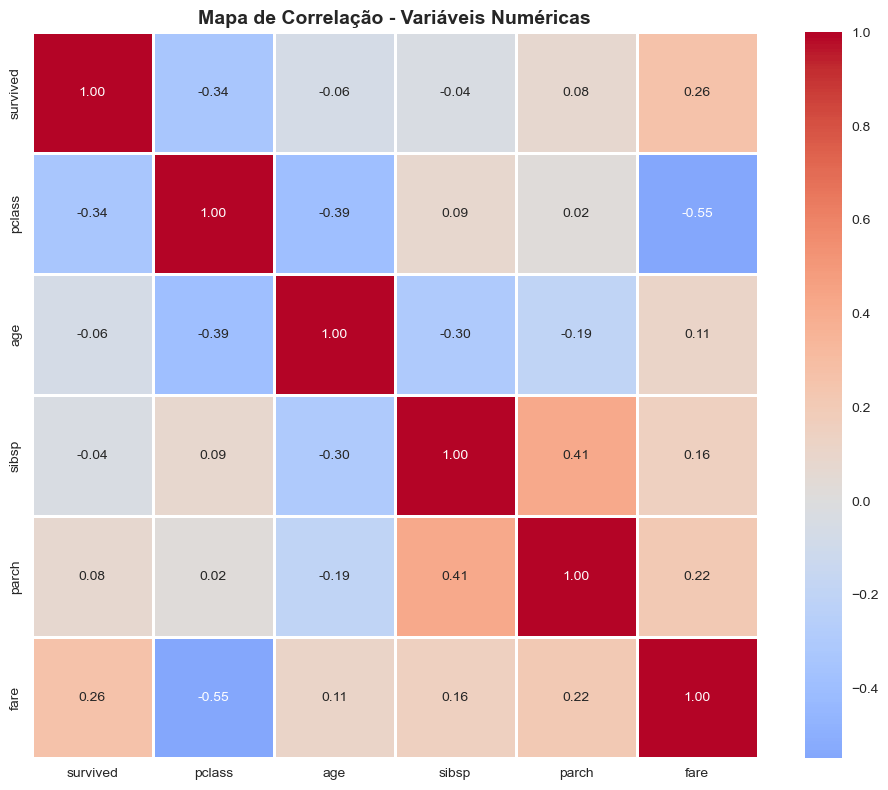


🔍 Correlações mais fortes com 'survived':


fare      0.256179
parch     0.080097
sibsp    -0.037082
age      -0.059665
pclass   -0.336528
Name: survived, dtype: float64

In [19]:
# 4. Correlação entre variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True)
plt.title('Mapa de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Correlações mais fortes com 'survived':")
correlation['survived'].sort_values(ascending=False)[1:6]

## 5️⃣ Limpeza e Preparação de Dados

In [21]:
# Criar cópia para trabalhar
df_clean = df.copy()

# 1. Tratar valores nulos em 'age' (preencher com mediana)
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)

# 2. Tratar 'embarked' (preencher com moda) - se a coluna existir
if 'embarked' in df_clean.columns:
    mode_embarked = df_clean['embarked'].mode()[0]
    df_clean['embarked'] = df_clean['embarked'].fillna(mode_embarked)

# 3. Criar variável 'family_size'
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1

# 4. Criar variável 'is_alone'
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

# 5. Transformar 'sex' em numérico (0=female, 1=male)
df_clean['sex_numeric'] = (df_clean['sex'] == 'male').astype(int)

print("✅ Dados limpos e features criadas!")
print(f"\n📊 Shape final: {df_clean.shape}")
print(f"\n❓ Valores nulos restantes: {df_clean.isnull().sum().sum()}")


✅ Dados limpos e features criadas!

📊 Shape final: (887, 11)

❓ Valores nulos restantes: 0


## 6️⃣ Modelo Machine Learning

In [22]:
# Selecionar features para o modelo
features = ['pclass', 'sex_numeric', 'age', 'family_size', 'is_alone', 'fare']
X = df_clean[features]
y = df_clean['survived']

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Dados de treino: {X_train.shape[0]} amostras")
print(f"📊 Dados de teste: {X_test.shape[0]} amostras")

📊 Dados de treino: 709 amostras
📊 Dados de teste: 178 amostras


In [23]:
# Modelo 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Métricas
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print("🤖 Logistic Regression:")
print(f"   Accuracy:  {lr_accuracy:.4f}")
print(f"   Precision: {lr_precision:.4f}")
print(f"   Recall:    {lr_recall:.4f}")
print(f"   F1-Score:  {lr_f1:.4f}")

🤖 Logistic Regression:
   Accuracy:  0.7528
   Precision: 0.7255
   Recall:    0.5522
   F1-Score:  0.6271


In [24]:
# Modelo 2: Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Métricas
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("🌳 Decision Tree:")
print(f"   Accuracy:  {dt_accuracy:.4f}")
print(f"   Precision: {dt_precision:.4f}")
print(f"   Recall:    {dt_recall:.4f}")
print(f"   F1-Score:  {dt_f1:.4f}")

🌳 Decision Tree:
   Accuracy:  0.7921
   Precision: 0.7778
   Recall:    0.6269
   F1-Score:  0.6942


In [25]:
# Comparação de modelos
results = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1-Score': [lr_f1, dt_f1]
})

print("\n📊 Comparação de Modelos:")
print(results.to_string(index=False))

# Escolher melhor modelo
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Modelo']
print(f"\n🏆 Melhor modelo: {best_model_name}")


📊 Comparação de Modelos:
             Modelo  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.752809   0.725490 0.552239  0.627119
      Decision Tree  0.792135   0.777778 0.626866  0.694215

🏆 Melhor modelo: Decision Tree


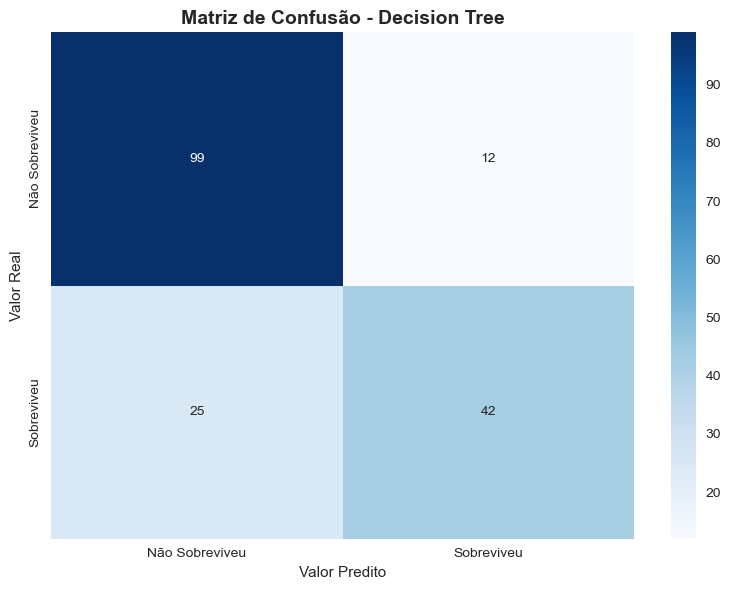

In [26]:
# Matriz de confusão do melhor modelo
best_pred = lr_pred if best_model_name == 'Logistic Regression' else dt_pred
cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title(f'Matriz de Confusão - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.tight_layout()
plt.show()

## 7️⃣ Insights e Conclusões

C:\Users\luti_\AppData\Local\Temp\ipykernel_9280\404960850.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


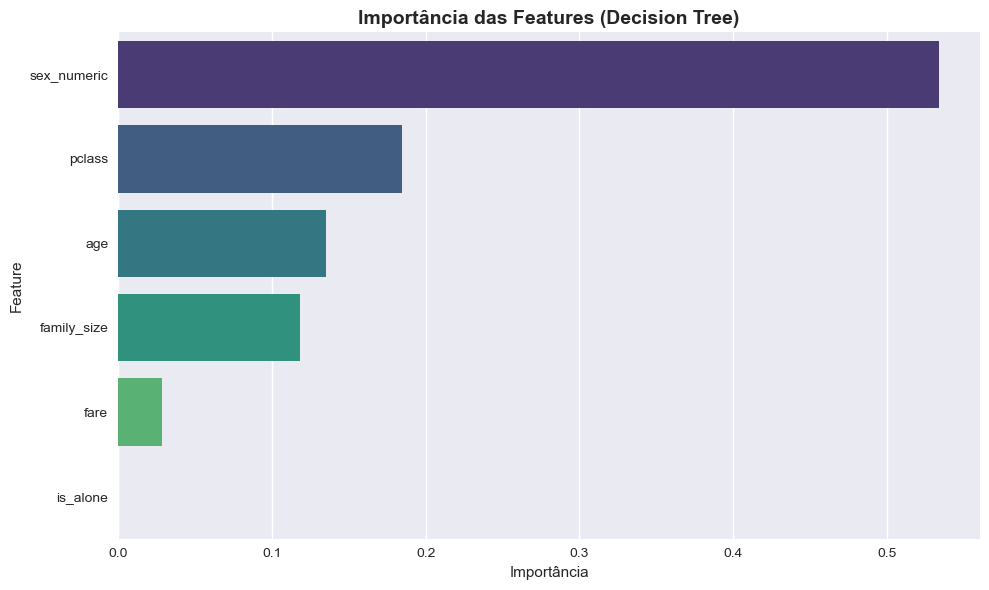


📊 Features mais importantes:
    Feature  Importance
sex_numeric    0.533801
     pclass    0.184390
        age    0.135148
family_size    0.118376
       fare    0.028285
   is_alone    0.000000


In [27]:
# Feature importance (para Decision Tree)
if best_model_name == 'Decision Tree':
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title('Importância das Features (Decision Tree)', fontsize=14, fontweight='bold')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Features mais importantes:")
    print(feature_importance.to_string(index=False))

## ✅ **Resumo do Dia 1**

**Aprendizados:**
1. ✅ Análise exploratória completa (EDA)
2. ✅ Tratamento de valores nulos
3. ✅ Feature engineering (family_size, is_alone)
4. ✅ Dois modelos ML comparados (Logistic Regression + Decision Tree)
5. ✅ Métricas avançadas (accuracy, precision, recall, F1)
6. ✅ Visualizações profissionais

**Próximos passos:**
- Dia 2: Criar API REST em Python (Flask/FastAPI)
- Integrar modelo treinado na API
- Endpoint de predição funcionando

---

**🎯 Modelo pronto para ser usado em produção!**